In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from datasets import SineCosineDataset
from tiny.utils import plot_point_cloud, plot_point_clouds, count_parameters
from tiny import Diffusion, PointCloudDDPM, PointCloudDiffusionTrainer, UnconditionalPointCloudDiT

In [3]:
dataset = SineCosineDataset(type="sine", num_points=32)
dataloader = DataLoader(dataset, collate_fn=dataset.collate, batch_size=128)

In [4]:
for batch in dataloader:
    break

In [5]:
dataset[0]

{'data': tensor([[-3.1416e+00,  8.7423e-08],
         [-2.9389e+00, -2.0130e-01],
         [-2.7362e+00, -3.9436e-01],
         [-2.5335e+00, -5.7127e-01],
         [-2.3309e+00, -7.2479e-01],
         [-2.1282e+00, -8.4864e-01],
         [-1.9255e+00, -9.3775e-01],
         [-1.7228e+00, -9.8847e-01],
         [-1.5201e+00, -9.9872e-01],
         [-1.3174e+00, -9.6808e-01],
         [-1.1148e+00, -8.9780e-01],
         [-9.1208e-01, -7.9078e-01],
         [-7.0939e-01, -6.5137e-01],
         [-5.0671e-01, -4.8530e-01],
         [-3.0403e-01, -2.9936e-01],
         [-1.0134e-01, -1.0117e-01],
         [ 1.0134e-01,  1.0117e-01],
         [ 3.0403e-01,  2.9936e-01],
         [ 5.0671e-01,  4.8530e-01],
         [ 7.0939e-01,  6.5137e-01],
         [ 9.1208e-01,  7.9078e-01],
         [ 1.1148e+00,  8.9780e-01],
         [ 1.3174e+00,  9.6808e-01],
         [ 1.5201e+00,  9.9872e-01],
         [ 1.7228e+00,  9.8847e-01],
         [ 1.9255e+00,  9.3775e-01],
         [ 2.1282e+00,  8.4864

In [15]:
diffusion = Diffusion(schedule_type="linear", num_timesteps=250, learn_sigma=False)
dit = UnconditionalPointCloudDiT(input_size=32, in_channels=2, depth=1, num_heads=1, hidden_size=128)
ddpm = PointCloudDDPM(dit, diffusion)

In [16]:
noise = torch.randn_like(batch["data"])
t = torch.tensor([50, 100])
noisy = diffusion.q_sample(batch["data"], t, noise)
noisy.shape

RuntimeError: The size of tensor a (2) must match the size of tensor b (128) at non-singleton dimension 0

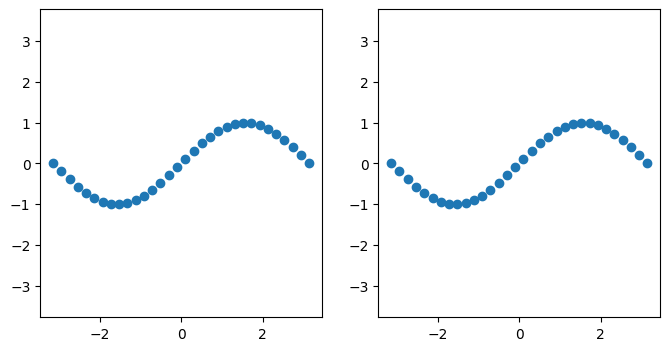

In [17]:
plot_point_clouds(batch["data"], 1, 2)

In [18]:
plot_point_clouds(noisy, 1, 2)

NameError: name 'noisy' is not defined

In [19]:
def monkey_patch_model(x, t):
    return noise

pred_x_start = diffusion.predict_x_start(noisy, t, noise)
pred_x_start.shape

NameError: name 'noisy' is not defined

In [20]:
plot_point_clouds(pred_x_start, 1, 2)

NameError: name 'pred_x_start' is not defined

In [21]:
count_parameters(dit)

380674

In [27]:
trainer = PointCloudDiffusionTrainer(
    ddpm,
    dataloader,
    num_epochs=10000 * 2,
    lr=3e-5
)

  0%|          | 27/20000 [00:00<01:33, 213.69it/s, loss=0.189]

100%|██████████| 20000/20000 [01:27<00:00, 227.85it/s, loss=0.174]


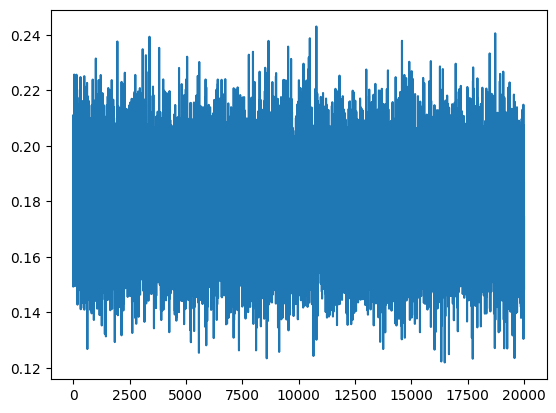

In [28]:
losses = trainer.train()
plt.plot(losses)

Sampling:  37%|███▋      | 92/250 [00:00<00:00, 914.78it/s]

Sampling: 100%|██████████| 250/250 [00:00<00:00, 914.24it/s]


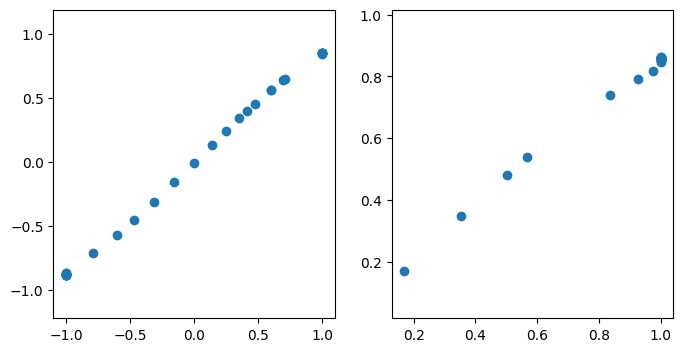

In [31]:
sample = diffusion.p_sample_loop(dit, (2, 32, 2))
plot_point_clouds(sample, 1, 2)

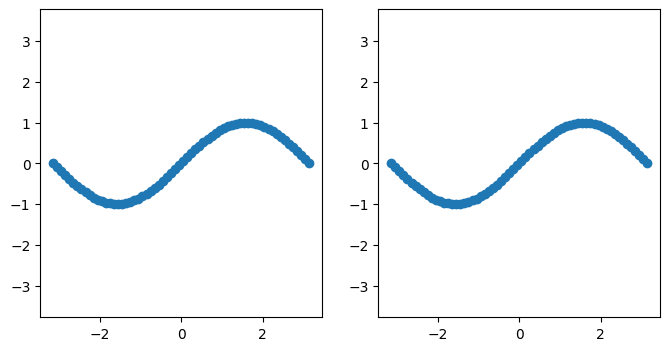

In [16]:
plot_point_clouds(batch["data"], 1, 2)